In [1]:
!pip install -U pyFTS
import pyFTS
!pip install -q xlrd
import pandas as pd
# Instal pustaka yang diperlukan
!pip install numpy pandas scipy scikit-fuzzy matplotlib seaborn
!pip install --upgrade pip

# Import pustaka yang diperlukan
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import seaborn as sns
import math

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=84f16339cba02bc35ab0e94b08147fa46aca3bec8578ed8b9a361ab5d6f7d4b5
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
!pip install numpy_indexed
import numpy_indexed as npi

In [3]:
df = pd.read_excel('FTS Tsaur.xlsx')
df

,Periode,Harga
0,2019-01-01,12211.09
1,2019-02-01,12222.00
2,2019-03-01,12124.00
3,2019-04-01,12019.00
4,2019-05-01,12008.00
5,2019-06-01,12009.00
6,2019-07-01,12021.00
7,2019-08-01,12018.00
8,2019-09-01,12050.00
9,2019-10-01,12108.00


In [4]:
column_name = 'Harga'
nilai_maximum = df[column_name].max()
nilai_minimum = df[column_name].min()
print("Nilai Maximum:", nilai_maximum)
print("Nilai Minimum:", nilai_minimum)

Nilai Maximum: 13458.06
Nilai Minimum: 10351.0


In [5]:
def get_data_max_min(df):
    D1 = 0
    D2 = 0.94
    data_maximum = max(df['Harga']) + D2
    data_minimum = min(df['Harga']) - D1
    return data_maximum, data_minimum

# Memanggil fungsi dan menyimpan nilai yang dikembalikan
data_maximum, data_minimum = get_data_max_min(df)

# Mencetak hasil
print("Umax:", data_maximum)
print("Umin:", data_minimum)

Umax: 13459.0
Umin: 10351.0


In [6]:
data_length = len(df)
K = (1 + (3.322*math.log(data_length,10)))
K_rounded_up = round(K/1)*1
if (K_rounded_up < K): K_rounded_up += 1
def get_interval_class(interval_high,interval_low,K_rounded_up):
  return (interval_high-interval_low)/K_rounded_up

print("Banyak Kelas =", K)

Banyak Kelas = 6.907018453774463


In [7]:
K = 7
panjang_interval = (data_maximum - data_minimum)/K
print("Panjang Interval =", panjang_interval)

Panjang Interval = 444.0


In [8]:
panjang_interval = 444
K_rounded_up = 7
interval = (0, 10351)
def generate_interval(panjang_interval,K_rounded_up,interval):
  int_K_rounded_up = int(K_rounded_up)+0
  mtx_interval = [ [ 0 for i in range(2) ] for j in range (int_K_rounded_up) ]
  counter = interval[1]
  for i in range (int_K_rounded_up):
    for j in range (2):
      if (j == 0): mtx_interval[i][j] = int(counter)
      else:counter += panjang_interval; mtx_interval[i][j] = int(counter)
  return (mtx_interval)
mtx_interval = generate_interval(panjang_interval, K_rounded_up, interval)
generate_interval(panjang_interval, K_rounded_up, interval)
print("Interval (ui, i=1,2,3,...,7):")
for i, (index, first) in enumerate(mtx_interval, start=1):
    print(f"u{i} = ({index} : {first})")

Interval (ui, i=1,2,3,...,7):
u1 = (10351 : 10795)
u2 = (10795 : 11239)
u3 = (11239 : 11683)
u4 = (11683 : 12127)
u5 = (12127 : 12571)
u6 = (12571 : 13015)
u7 = (13015 : 13459)


In [9]:
categories = {
    1: "sangat murah",
    2: "murah",
    3: "agak murah",
    4: "normal",
    5: "mahal",
    6: "agak mahal",
    7: "sangat mahal"
}

print("Nilai Linguistik pada Interval:")
for i, (index, first) in enumerate(mtx_interval, start=1):
    category = categories.get(i, "undefined")
    print(f"u{i} = ({index} : {first}) -> {category}")

Nilai Linguistik pada Interval:
u1 = (10351 : 10795) -> sangat murah
u2 = (10795 : 11239) -> murah
u3 = (11239 : 11683) -> agak murah
u4 = (11683 : 12127) -> normal
u5 = (12127 : 12571) -> mahal
u6 = (12571 : 13015) -> agak mahal
u7 = (13015 : 13459) -> sangat mahal


In [10]:
def mid_point(mtx_interval):
    mid_points = []
    for interval in mtx_interval:
        mid_point = sum(interval) / 2
        mid_points.append(mid_point)
    return mid_points

mid_points = mid_point(mtx_interval)
print("Nilai Tengah (mi):")
for i, mid in enumerate(mid_points, start=1):
    print(f"m{i} = {mid}")

Nilai Tengah (mi):
m1 = 10573.0
m2 = 11017.0
m3 = 11461.0
m4 = 11905.0
m5 = 12349.0
m6 = 12793.0
m7 = 13237.0


In [11]:
def fuzzify(df,mtx_interval,data_length):
  mtx_fuzzify = []
  for i in range (data_length):
    curr_data = (df['Harga'][i])
    for j in range (len(mtx_interval)):
      if (j == 0):
        if (mtx_interval[j][0] <= curr_data) and (mtx_interval[j][1] >= curr_data):
          mtx_fuzzify.append([i+1,j+1])
      else:
        if (mtx_interval[j][0] < curr_data) and (mtx_interval[j][1] >= curr_data):
          mtx_fuzzify.append([i+1,j+1])
  return(mtx_fuzzify)
fuzzify(df,mtx_interval,data_length)
fuzzyfikasi = fuzzify(df,mtx_interval,data_length)
print("Fuzzyfikasi:")
for i, (index, first) in enumerate(fuzzyfikasi, start=1):
    print(f"t={i} memiliki fuzzyfikasi (A{first})")

Fuzzyfikasi:
t=1 memiliki fuzzyfikasi (A5)
t=2 memiliki fuzzyfikasi (A5)
t=3 memiliki fuzzyfikasi (A4)
t=4 memiliki fuzzyfikasi (A4)
t=5 memiliki fuzzyfikasi (A4)
t=6 memiliki fuzzyfikasi (A4)
t=7 memiliki fuzzyfikasi (A4)
t=8 memiliki fuzzyfikasi (A4)
t=9 memiliki fuzzyfikasi (A4)
t=10 memiliki fuzzyfikasi (A4)
t=11 memiliki fuzzyfikasi (A4)
t=12 memiliki fuzzyfikasi (A5)
t=13 memiliki fuzzyfikasi (A5)
t=14 memiliki fuzzyfikasi (A5)
t=15 memiliki fuzzyfikasi (A5)
t=16 memiliki fuzzyfikasi (A5)
t=17 memiliki fuzzyfikasi (A5)
t=18 memiliki fuzzyfikasi (A5)
t=19 memiliki fuzzyfikasi (A5)
t=20 memiliki fuzzyfikasi (A5)
t=21 memiliki fuzzyfikasi (A5)
t=22 memiliki fuzzyfikasi (A5)
t=23 memiliki fuzzyfikasi (A5)
t=24 memiliki fuzzyfikasi (A5)
t=25 memiliki fuzzyfikasi (A1)
t=26 memiliki fuzzyfikasi (A1)
t=27 memiliki fuzzyfikasi (A1)
t=28 memiliki fuzzyfikasi (A1)
t=29 memiliki fuzzyfikasi (A1)
t=30 memiliki fuzzyfikasi (A1)
t=31 memiliki fuzzyfikasi (A1)
t=32 memiliki fuzzyfikasi (A1)
t=33

In [12]:
mtx_fuzzify = fuzzify(df,mtx_interval,data_length)

def flr(mtx_fuzzify):
  mtx_flr = []
  for i in range (len(mtx_fuzzify)-1):
    mtx_flr.append((i+2, mtx_fuzzify[i][1],mtx_fuzzify[i+1][1]))
  return (mtx_flr)

mtx_flr = flr(mtx_fuzzify)

 # Memanggil FLR
result_flr = flr(mtx_fuzzify)
print("Hasil FLR Ai->Ap:")
for i, (index, first, second) in enumerate(mtx_flr, start=1):
    print(f"t={index}: (A{first} -> A{second})")

Hasil FLR Ai->Ap:
t=2: (A5 -> A5)
t=3: (A5 -> A4)
t=4: (A4 -> A4)
t=5: (A4 -> A4)
t=6: (A4 -> A4)
t=7: (A4 -> A4)
t=8: (A4 -> A4)
t=9: (A4 -> A4)
t=10: (A4 -> A4)
t=11: (A4 -> A4)
t=12: (A4 -> A5)
t=13: (A5 -> A5)
t=14: (A5 -> A5)
t=15: (A5 -> A5)
t=16: (A5 -> A5)
t=17: (A5 -> A5)
t=18: (A5 -> A5)
t=19: (A5 -> A5)
t=20: (A5 -> A5)
t=21: (A5 -> A5)
t=22: (A5 -> A5)
t=23: (A5 -> A5)
t=24: (A5 -> A5)
t=25: (A5 -> A1)
t=26: (A1 -> A1)
t=27: (A1 -> A1)
t=28: (A1 -> A1)
t=29: (A1 -> A1)
t=30: (A1 -> A1)
t=31: (A1 -> A1)
t=32: (A1 -> A1)
t=33: (A1 -> A1)
t=34: (A1 -> A1)
t=35: (A1 -> A1)
t=36: (A1 -> A1)
t=37: (A1 -> A1)
t=38: (A1 -> A1)
t=39: (A1 -> A1)
t=40: (A1 -> A1)
t=41: (A1 -> A1)
t=42: (A1 -> A1)
t=43: (A1 -> A1)
t=44: (A1 -> A1)
t=45: (A1 -> A1)
t=46: (A1 -> A2)
t=47: (A2 -> A2)
t=48: (A2 -> A3)
t=49: (A3 -> A3)
t=50: (A3 -> A4)
t=51: (A4 -> A4)
t=52: (A4 -> A4)
t=53: (A4 -> A4)
t=54: (A4 -> A4)
t=55: (A4 -> A5)
t=56: (A5 -> A5)
t=57: (A5 -> A7)
t=58: (A7 -> A7)
t=59: (A7 -> A7)
t=60

In [13]:
def flrg(mtx_flr, K_rounded_up):
    int_K_rounded_up = int(K_rounded_up)
    mtx_flrg = [[] for _ in range(int_K_rounded_up)]
    for i in range(len(mtx_flr)):
        temp = mtx_flr[i][1] - 1  # Kurangi 1 dari temp agar sesuai dengan rentang indeks
        if 0 <= temp < int_K_rounded_up:
            mtx_flrg[temp].append(mtx_flr[i][2])
        else:
            raise IndexError(f"Index {temp} out of range for mtx_flrg with size {int_K_rounded_up}")
    return mtx_flrg

mtx_flrg = flrg(mtx_flr, K_rounded_up)

# Memanggil FLRG
mtx_flrg = flrg(mtx_flr, K_rounded_up)
print("Hasil FLRG Ai -> Ap:")
for i, group in enumerate(mtx_flrg, start=1):
    print(f"A{i} -> A{group}")

Hasil FLRG Ai -> Ap:
A1 -> A[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
A2 -> A[2, 3]
A3 -> A[3, 4]
A4 -> A[4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5]
A5 -> A[5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 7]
A6 -> A[]
A7 -> A[7, 7, 7]


In [14]:
def flrg(mtx_flr, K_rounded_up):
    int_K_rounded_up = int(K_rounded_up)
    mtx_flrg = [[] for _ in range(int_K_rounded_up)]
    for i in range(len(mtx_flr)):
        temp = mtx_flr[i][1] - 1  # Kurangi 1 dari temp agar sesuai dengan rentang indeks
        if 0 <= temp < int_K_rounded_up:
            mtx_flrg[temp].append(mtx_flr[i][2])
        else:
            raise IndexError(f"Index {temp} out of range for mtx_flrg with size {int_K_rounded_up}")
    return mtx_flrg

# Contoh data mtx_flr dan K_rounded_up
mtx_flr = flr(mtx_fuzzify)

K_rounded_up = 7

# Memanggil fungsi flrg
mtx_flrg = flrg(mtx_flr, K_rounded_up)

# Menghitung dan mencetak jumlah FLRG dalam setiap grup
print("FLRG Counts:")
flrg_counts = [len(group) for group in mtx_flrg]
for i, count in enumerate(flrg_counts, start=1):
    print(f"A{i} -> Banyaknya: {count}")

# Mencetak hasil FLRG
print("\nFLRG Ai:")
for i, group in enumerate(mtx_flrg, start=1):
    print(f"A{i} -> A{group}")

# Membuat matriks dari jumlah FLRG
print("\nFLRG Matrix:")
flrg_matrix = [[0 for _ in range(K_rounded_up)] for _ in range(K_rounded_up)]
for i in range(len(mtx_flr)):
    row = mtx_flr[i][1] - 1
    col = mtx_flr[i][2] - 1
    flrg_matrix[row][col] += 1

for row in flrg_matrix:
    print(row)

FLRG Counts:
A1 -> Banyaknya: 21
A2 -> Banyaknya: 2
A3 -> Banyaknya: 2
A4 -> Banyaknya: 14
A5 -> Banyaknya: 17
A6 -> Banyaknya: 0
A7 -> Banyaknya: 3

FLRG Ai:
A1 -> A[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
A2 -> A[2, 3]
A3 -> A[3, 4]
A4 -> A[4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5]
A5 -> A[5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 7]
A6 -> A[]
A7 -> A[7, 7, 7]

FLRG Matrix:
[20, 1, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 12, 2, 0, 0]
[1, 0, 0, 1, 14, 0, 1]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 3]


In [15]:
def generate_big_mtx(flrg_matrix):
    row_sums = np.sum(flrg_matrix, axis=1)
    prob_array = flrg_matrix / row_sums[:, np.newaxis]
    np.set_printoptions(precision=3, suppress=True)
    return prob_array

big_mtx = generate_big_mtx(flrg_matrix)
print("Resulting Probability Transition Matrix:")
print(big_mtx)

Resulting Probability Transition Matrix:
[[0.952 0.048 0.    0.    0.    0.    0.   ]
 [0.    0.5   0.5   0.    0.    0.    0.   ]
 [0.    0.    0.5   0.5   0.    0.    0.   ]
 [0.    0.    0.    0.857 0.143 0.    0.   ]
 [0.059 0.    0.    0.059 0.824 0.    0.059]
 [  nan   nan   nan   nan   nan   nan   nan]
 [0.    0.    0.    0.    0.    0.    1.   ]]


<ipython-input-15-aaa5a65e5327>:3: RuntimeWarning: invalid value encountered in divide
  prob_array = flrg_matrix / row_sums[:, np.newaxis]


In [ ]:
print("Matriks Probabilitas Transisi (Pip)")
print("Pip   1     2     3      4    5     6     7")
for i, group in enumerate(big_mtx, start=1):
    print(f"{i}  {group}")

Matriks Probabilitas Transisi (Pip)
Pip   1     2     3      4    5     6     7
1  [0.952 0.048 0.    0.    0.    0.    0.   ]
2  [0.  0.5 0.5 0.  0.  0.  0. ]
3  [0.  0.  0.5 0.5 0.  0.  0. ]
4  [0.    0.    0.    0.857 0.143 0.    0.   ]
5  [0.059 0.    0.    0.059 0.824 0.    0.059]
6  [nan nan nan nan nan nan nan]
7  [0. 0. 0. 0. 0. 0. 1.]


In [17]:
def forecast_next_period(mtx_fuzzify, mid_points, big_mtx, last_forecast):
    last_period_fuzzify = mtx_fuzzify[-1][1]  # Mendapatkan hasil mtx_fuzzify dari periode terakhir

    # Mencari indeks baris yang memiliki probabilitas 1
    idx_prob_1 = -1
    for idx, prob_row in enumerate(big_mtx):
        if all(prob == 0 for prob in prob_row[:-1]) and prob_row[-1] == 1:
            idx_prob_1 = idx
            break

    # Periksa apakah indeks valid
    if idx_prob_1 >= 0 and idx_prob_1 < len(mid_points):
        # Menghitung nilai peramalan berdasarkan aturan yang diberikan
        if last_period_fuzzify == idx_prob_1 + 1:
            forecast = mid_points[idx_prob_1]
        else:
            forecast_sum = 0
            for i, prob in enumerate(big_mtx[last_period_fuzzify - 1]):
                if i == last_period_fuzzify - 1:
                    forecast_sum += last_forecast * prob
                else:
                    forecast_sum += mid_points[i] * prob
            forecast = forecast_sum
    else:
        forecast = None

    return forecast

def forecast_all_periods(mtx_fuzzify, mid_points, big_mtx, actual_data):
    forecasts = []
    for i in range(1, len(mtx_fuzzify)):
        last_forecast = actual_data[i - 1]  # Menggunakan data aktual periode sebelumnya
        forecast = forecast_next_period(mtx_fuzzify[:i], mid_points, big_mtx, last_forecast)
        forecasts.append(forecast)
    return forecasts

# Data yang diketahui
mtx_fuzzify = fuzzify(df, mtx_interval, data_length)
actual_data = df['Harga'].values

# Peramalan untuk semua periode
forecasts = forecast_all_periods(mtx_fuzzify, mid_points, big_mtx, actual_data)

for i, forecast in enumerate(forecasts):
    if forecast is not None:
        print(f"Forecast for period {i + 2}: {forecast}")
    else:
        print(f"No forecast available for period {i + 2}")


Forecast for period 2: 12157.074117647058
Forecast for period 3: 12166.05882352941
Forecast for period 4: 12156.142857142857
Forecast for period 5: 12066.142857142857
Forecast for period 6: 12056.714285714284
Forecast for period 7: 12057.571428571428
Forecast for period 8: 12067.857142857141
Forecast for period 9: 12065.285714285714
Forecast for period 10: 12092.714285714284
Forecast for period 11: 12142.42857142857
Forecast for period 12: 12152.714285714284
Forecast for period 13: 12133.96588235294
Forecast for period 14: 12265.491764705881
Forecast for period 15: 12275.711764705882
Forecast for period 16: 12286.294117647058
Forecast for period 17: 12297.905882352941
Forecast for period 18: 12224.55411764706
Forecast for period 19: 12167.689411764704
Forecast for period 20: 12158.342352941176
Forecast for period 21: 12157.881176470588
Forecast for period 22: 12138.767058823529
Forecast for period 23: 12137.210588235293
Forecast for period 24: 12130.334117647059
Forecast for period 25:

In [18]:
def generate_mtx_dt(mtx_flr, panjang_interval):
    mtx_dt = []
    for i in range(len(mtx_flr)):
        elem = mtx_flr[i]
        selisih = elem[2] - elem[1]
        if selisih == 0:
            mtx_dt.append(0)
        else:
            mtx_dt.append(panjang_interval / 2 * selisih)
    return mtx_dt

nilai_penyesuaian = generate_mtx_dt(mtx_flr, panjang_interval)
for i, nilai in enumerate(nilai_penyesuaian, start=2):  # Mulai dari 2 karena periode pertama kosong
    print(f"Nilai penyesuaian t = {i} adalah {nilai}")


Nilai penyesuaian t = 2 adalah 0
Nilai penyesuaian t = 3 adalah -222.0
Nilai penyesuaian t = 4 adalah 0
Nilai penyesuaian t = 5 adalah 0
Nilai penyesuaian t = 6 adalah 0
Nilai penyesuaian t = 7 adalah 0
Nilai penyesuaian t = 8 adalah 0
Nilai penyesuaian t = 9 adalah 0
Nilai penyesuaian t = 10 adalah 0
Nilai penyesuaian t = 11 adalah 0
Nilai penyesuaian t = 12 adalah 222.0
Nilai penyesuaian t = 13 adalah 0
Nilai penyesuaian t = 14 adalah 0
Nilai penyesuaian t = 15 adalah 0
Nilai penyesuaian t = 16 adalah 0
Nilai penyesuaian t = 17 adalah 0
Nilai penyesuaian t = 18 adalah 0
Nilai penyesuaian t = 19 adalah 0
Nilai penyesuaian t = 20 adalah 0
Nilai penyesuaian t = 21 adalah 0
Nilai penyesuaian t = 22 adalah 0
Nilai penyesuaian t = 23 adalah 0
Nilai penyesuaian t = 24 adalah 0
Nilai penyesuaian t = 25 adalah -888.0
Nilai penyesuaian t = 26 adalah 0
Nilai penyesuaian t = 27 adalah 0
Nilai penyesuaian t = 28 adalah 0
Nilai penyesuaian t = 29 adalah 0
Nilai penyesuaian t = 30 adalah 0
Nilai pe

In [19]:
def generate_mtx_final_forecast(df, forecasts, mtx_dt):
    mtx = [None]  # Periode pertama tidak memiliki peramalan
    for i in range(len(forecasts)):
        temp = abs(forecasts[i] + mtx_dt[i])
        mtx.append(temp)
    return mtx

# Contoh penggunaan fungsi
mtx_final_forecast = generate_mtx_final_forecast(df, forecasts, nilai_penyesuaian)
for i, forecast in enumerate(mtx_final_forecast[1:], start=2):  # Mulai dari 1 karena periode pertama kosong
    print(f"Peramalan Akhir Periode {i}: {forecast}")

# Peramalan untuk periode berikutnya
next_forecast = forecast_next_period(mtx_fuzzify, mid_points, big_mtx, last_forecast)
print(f"Peramalan periode berikutnya (61): {next_forecast}")

Peramalan Akhir Periode 2: 12157.074117647058
Peramalan Akhir Periode 3: 11944.05882352941
Peramalan Akhir Periode 4: 12156.142857142857
Peramalan Akhir Periode 5: 12066.142857142857
Peramalan Akhir Periode 6: 12056.714285714284
Peramalan Akhir Periode 7: 12057.571428571428
Peramalan Akhir Periode 8: 12067.857142857141
Peramalan Akhir Periode 9: 12065.285714285714
Peramalan Akhir Periode 10: 12092.714285714284
Peramalan Akhir Periode 11: 12142.42857142857
Peramalan Akhir Periode 12: 12374.714285714284
Peramalan Akhir Periode 13: 12133.96588235294
Peramalan Akhir Periode 14: 12265.491764705881
Peramalan Akhir Periode 15: 12275.711764705882
Peramalan Akhir Periode 16: 12286.294117647058
Peramalan Akhir Periode 17: 12297.905882352941
Peramalan Akhir Periode 18: 12224.55411764706
Peramalan Akhir Periode 19: 12167.689411764704
Peramalan Akhir Periode 20: 12158.342352941176
Peramalan Akhir Periode 21: 12157.881176470588
Peramalan Akhir Periode 22: 12138.767058823529
Peramalan Akhir Periode 2

In [20]:
# Menghitung MAPE untuk setiap periode
def calculate_mape(actual, forecast):
    if actual != 0:
        return abs((actual - forecast) / actual) * 100
    else:
        return None  # Hindari pembagian dengan nol

mapes = []
actual_values = df['Harga'].tolist()[1:]  # Menghindari periode pertama yang tidak memiliki peramalan
for actual, forecast in zip(actual_values, mtx_final_forecast[1:]):
    if forecast is not None:
        mape = calculate_mape(actual, forecast)
        mapes.append(mape)

# Menghitung rata-rata MAPE
average_mape = sum(mapes) / len(mapes)

# Cetak MAPE untuk setiap periode
print("MAPE for each period:")
for i, mape in enumerate(mapes, start=2):
    print(f"Period {i}: {mape:.2f}%")

# Cetak rata-rata MAPE
print(f"\nAverage MAPE: {average_mape:.2f}%")

MAPE for each period:
Period 2: 0.53%
Period 3: 1.48%
Period 4: 1.14%
Period 5: 0.48%
Period 6: 0.40%
Period 7: 0.30%
Period 8: 0.41%
Period 9: 0.13%
Period 10: 0.13%
Period 11: 0.19%
Period 12: 1.57%
Period 13: 1.69%
Period 14: 0.73%
Period 15: 0.75%
Period 16: 0.77%
Period 17: 0.04%
Period 18: 0.00%
Period 19: 0.37%
Period 20: 0.44%
Period 21: 0.25%
Period 22: 0.40%
Period 23: 0.34%
Period 24: 0.44%
Period 25: 7.38%
Period 26: 0.20%
Period 27: 0.77%
Period 28: 0.93%
Period 29: 0.02%
Period 30: 0.30%
Period 31: 0.51%
Period 32: 0.39%
Period 33: 0.32%
Period 34: 0.15%
Period 35: 0.22%
Period 36: 0.22%
Period 37: 0.37%
Period 38: 0.48%
Period 39: 0.32%
Period 40: 0.33%
Period 41: 0.32%
Period 42: 0.26%
Period 43: 0.25%
Period 44: 0.71%
Period 45: 1.85%
Period 46: 0.54%
Period 47: 1.74%
Period 48: 0.84%
Period 49: 0.12%
Period 50: 0.07%
Period 51: 0.00%
Period 52: 0.06%
Period 53: 0.22%
Period 54: 0.18%
Period 55: 1.89%
Period 56: 1.35%
Period 57: 3.00%
Period 58: 0.59%
Period 59: 1.07%


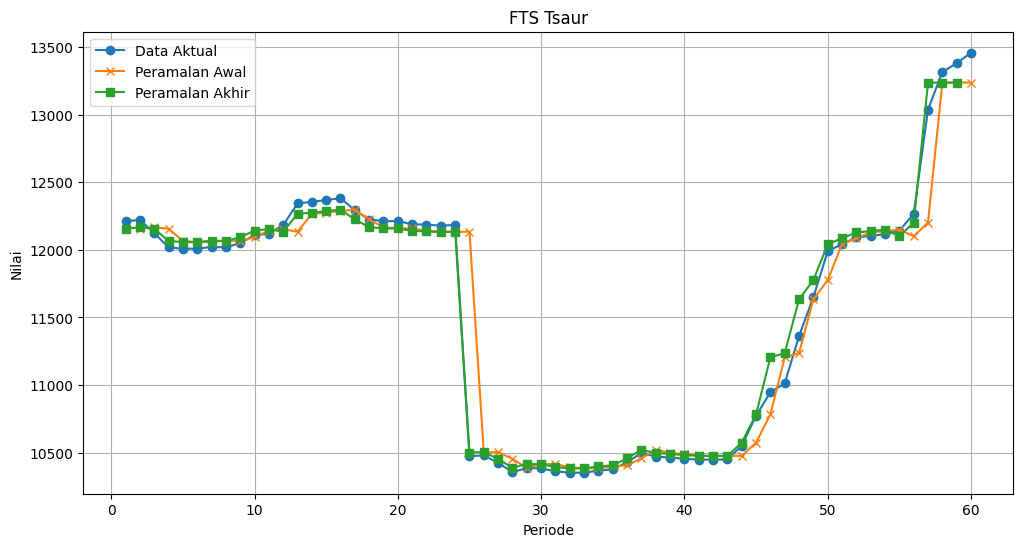

In [25]:
def plot_forecasts(actual_data, forecasts, mtx_final_forecast):
    periods = range(1, len(actual_data) + 1)

    plt.figure(figsize=(12, 6))

    # Plot data aktual
    plt.plot(periods, actual_data, label='Data Aktual', marker='o')

    # Plot hasil peramalan
    forecast_periods = range(2, len(forecasts) + 2)  # Peramalan mulai dari periode ke-2
    plt.plot(forecast_periods, forecasts, label='Peramalan Awal', marker='x')

    # Plot hasil peramalan akhir
    final_forecast_periods = range(1, len(mtx_final_forecast))  # Mengabaikan elemen pertama (None)
    plt.plot(final_forecast_periods, mtx_final_forecast[1:], label='Peramalan Akhir', marker='s')

    plt.xlabel('Periode')
    plt.ylabel('Nilai')
    plt.title('FTS Tsaur')
    plt.legend()
    plt.grid(True)
    plt.show()

actual_data = df['Harga'].values
plot_forecasts(actual_data, forecasts, mtx_final_forecast)